# Covid-19 Tweets - Sentiment Analysis

<b>Covid-19</b> is an infectious disease caused by the newly discovered coronavirus.It was first identified in December 2019 in <b>Wuhan, China</b>, and has resulted in an ongoing <b>pandemic</b>.
It spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes. Most infected with the virus have faced mild respiratory illness with around <b>80%</b> cases being <b>asymptomatic</b>. People with underlying medical problems are found to be more likely to develop serious illness.

 ![](img/covid19.jpg)

Tweets are a good way for people to express their thoughts in front of a large audience. Therefore analyzing tweets and predicting their sentiments helps us to better understand what is going through everyones mind, how people are coping up being quaratined for months, how it has affected the life of so many people and also some positive effects (yes there are a few) that this pandemic has caused.

I have carried out some analysis on the same below. The sentiments for the tweets have not been provided in the dataset so I have presented my way on how one could go about this problem so hope this helps. Also I would appreciate any kind of feedback.

In [1]:
#Import the necessary libraries
import pandas as pd
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import keras
from keras.models import Model
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [61]:
df = pd.read_csv('data/covid_19_tweets.CSV')

Let's look at the top five rows of our dataset to get a basic overview

In [62]:
df.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1255285670781878275,1244488571026690048,2020-04-29T00:00:00Z,NikoledMX,"Las solicitudes de hospitales y otras organizaciones superan los 350,000 protectores y más de 150 empresas en el mundo trabajan con esta técnica de fabricación #Covid19 #Coronavirus #Impresión3D\n...",TweetDeck,NaN,NaN,NaN,False,False,13,0,NaN,NaN,NaN,3,25,NaN,2020-03-30T04:56:21Z,False,es
1,1255285670182113282,817072420947247104,2020-04-29T00:00:00Z,Tu_IMSS_Coah,Prepara tu propio gel antibacterial es fácil y económico; y déjalo al alcance de toda tu familia |\n#Coronavirus \n#SanaDistancia \n#MéxicoUnido \n#QuédateEnCasaYa #IMSSolidario \n#COVID19\nhttp...,TweetDeck,NaN,NaN,NaN,False,False,1828,0,NaN,NaN,NaN,1710,169,NaN,2017-01-05T18:17:00Z,False,es
2,1255285669259292673,184827671,2020-04-29T00:00:00Z,AntenaSanLuis,"Por más terror que cause, la apocalíptica relación entre el #5G y el #Coronavirus existe solo en las mentes de unos cuantos / Xataka https://t.co/ckcgclbZzH https://t.co/eZAW6GyKre",TweetDeck,NaN,NaN,NaN,False,False,836,0,NaN,NaN,NaN,122908,4370,NaN,2010-08-30T15:47:01Z,False,es
3,1255285669888438272,82608449,2020-04-29T00:00:00Z,DiarioPresente,Panorama en #Tabasco de casos de #COVID19 #Entérate\n➡️ https://t.co/LmtfwKRi00 https://t.co/uVxSKvfZpt,TweetDeck,NaN,NaN,NaN,False,False,6317,3,NaN,NaN,NaN,145940,3116,NaN,2009-10-15T12:46:02Z,False,es
4,1255285670903496707,1042498579909107712,2020-04-29T00:00:00Z,ContraReplicaMX,"#Francia comenzará a levantar las medidas de confinamiento por #Covid19 a partir del 11 de mayo para evitar un derrumbe económico, informó el primer ministro Edouard Philippe (@EPhilippePM). http...",TweetDeck,NaN,NaN,NaN,False,False,5801,1,NaN,NaN,NaN,13548,2553,NaN,2018-09-19T19:40:04Z,False,es


The first two columns and also the 'screen_name' column can be dropped as they wont be necessary during Visualization

In [63]:
df.drop(['status_id', 'user_id', 'screen_name'], axis = 1, inplace = True)

Check the amount of missing values present

In [64]:
num_tweets = len(df)

In [65]:
df.isnull().sum()/num_tweets * 100

created_at                0.000000
text                      0.000000
source                    0.000767
reply_to_status_id       88.487157
reply_to_user_id         85.870323
reply_to_screen_name     85.870323
is_quote                  0.000000
is_retweet                0.000000
favourites_count          0.000000
retweet_count             0.000000
country_code             95.943167
place_full_name          95.931669
place_type               95.931669
followers_count           0.000000
friends_count             0.000000
account_lang            100.000000
account_created_at        0.000000
verified                  0.000000
lang                      0.000000
dtype: float64

There are 7 columns with more than 85% of it's values missing so I will be dropping these as they won't provide much info

In [66]:
missing_cols = list(df.columns[(df.isnull().sum()/num_tweets * 100) > 85.0])

df.drop(missing_cols, axis = 1, inplace = True)

Adding a 'Language' column using the given language codes

In [67]:
from iso639 import languages

def get_language(x):
    try:
        return languages.get(alpha2=x).name 
    except KeyError:
        return x

In [68]:
df['language'] = df['lang'].apply(lambda x: get_language(x))

In [69]:
df['language'].value_counts()[:10]

English       220923
Spanish        60837
French         23133
und            16933
Italian        12634
Portuguese     10079
German          6613
Hindi           5447
in              4206
Catalan         3781
Name: language, dtype: int64

In [70]:
df['language'] = df['language'].str.replace('und','Undefined')

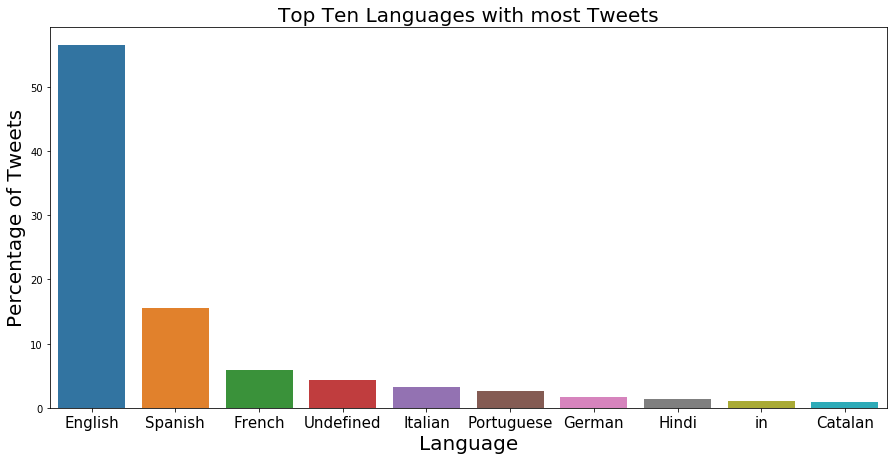

In [71]:
plt.figure(figsize = (15,7))
sns.barplot(x = df['language'].value_counts()[:10].index , y = df['language'].value_counts()[:10]/num_tweets*100)
plt.xlabel('Language', fontsize = 20)
plt.ylabel('Percentage of Tweets', fontsize = 20)
plt.xticks(fontsize = 15)
plt.title('Top Ten Languages with most Tweets', fontsize=20)
plt.show()

We see that 56% of all tweets are in English which is no surprise followed by Spanish and French at 15% and 5% respectively.

# Sentiment Classification

Before I can continue with any visualization I have to first Classify the sentiment of each tweet

For now I'll be only focusing on the English tweets

In [15]:
df_eng = df[df['language'] == 'English']

In [16]:
df_eng['language'].value_counts()

English    220923
Name: language, dtype: int64

Let's take a look at one of the tweets

In [17]:
df_eng['text'][1128]

"#Coronavirus #Facebook Seriously Facebook?  This is Ridiculous!\nArmy chaplains' prayer videos during coronavirus removed from Facebook after complaints\n\nhttps://t.co/JabCnPSrsF"

As you can see the tweets are not clean. They contain urls, hashtags, stop words, special chracters and some also contains emoticons. So i've made a function to clean and tokenize them which will be in my repo.

In [18]:
from clean_text import CleanText 
clean = CleanText()

In [19]:
df_eng['text_clean'] = clean.clean(df_eng['text']) #clean() removes urls, emoticons and hashtags

In [20]:
df_eng['text_clean'][1128]

"    seriously facebook?  this is ridiculous!\narmy chaplains' prayer videos during coronavirus removed from facebook after complaints\n\n"

In [21]:
df_eng['text_clean'] = df_eng['text_clean'].apply(lambda x: clean.tokenize(x)) #remove punctuations, stopwords, lemmatize and splits the sentences into tokens

In [22]:
df_eng['text_clean'][1128]

['seriously',
 'facebook',
 'ridiculous',
 'army',
 'chaplain',
 'prayer',
 'video',
 'coronavirus',
 'removed',
 'facebook',
 'complaint']

All the tweets have been cleaned and tokenized. This will make it easier to vectorize the words and help the model to predict the sentiment of each tweet.

In [23]:
#Saving the dataframe as a pickle file to resume where I left off incase the kernel crashes or if I have to continue some other day
df_eng.to_pickle('pickle_files/tweets_eng.pkl') #Also reading and writing pickle files are much faster than csv

In [2]:
df_eng = pd.read_pickle('pickle_files/tweets_eng.pkl')

### Word Embeddings

Before we can start with the classification we have to find a way to represent the words.
Now there two popular ways to do this: <b> Word Vectors</b> and <b>Word Embeddings</b>

<b>Word Vectors</b> are high dimensional sparse (mostly 0s) vectors where each vector represents a word which is simply one hot encoded.
<b>Word Embeddings</b> unlike word vectors represent the words in dense vectors. The words are mapped into a meaningful space where the distance between words is related to their semantic similarity.


I'll be using pretrained <b>GloVe</b> embeddings to represent the words

In [3]:
docs = df_eng['text_clean']

#tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1

#encode the documents
encoded_docs = t.texts_to_sequences(docs)

#pad docs to max length
padded_docs = pad_sequences(encoded_docs, maxlen = 22, padding = 'post') 

As the sentiments for the tweets have not been provided the classifier can be trained on any public data which contains labels. So I trained my model on an <b>Airline tweets sentiment</b> dataset(availble in kaggle) in which the tweets were separated into three sentiments <b>'Positive', 'Negative'</b> and <b>'Neutral'</b>

This dataset was trained on a 6 layer <b>LSTM</b> network with pretained <b>GloVe embeddings</b>. The model is available in my repository as 'sentiment_classifier.py'. The final model which I've used below had an accuracy of:<b> Train set 87%, Dev set 81%, Test set 80%</b>

In [4]:
# Loading the classifier 
classifier = keras.models.load_model('Models/sentiment_classifier4.h5') #Negative: 0, Neutral: 1, Postive: 2

In [5]:
labels_categorical = classifier.predict(padded_docs) # Predicting the Sentiments of the Covid-19 tweets

In [6]:
labels_categorical[:10] #Output of each class by the softmax function

array([[9.9656039e-01, 3.1826370e-03, 2.5702154e-04],
       [9.8398536e-01, 1.4558644e-02, 1.4561004e-03],
       [9.7064734e-01, 9.6679758e-03, 1.9684764e-02],
       [9.9636590e-01, 3.0258207e-03, 6.0829037e-04],
       [5.5838430e-01, 3.7181163e-01, 6.9804057e-02],
       [7.1162924e-02, 8.4456855e-01, 8.4268510e-02],
       [7.9039484e-01, 1.7780682e-01, 3.1798355e-02],
       [3.6259410e-01, 5.6655568e-01, 7.0850268e-02],
       [1.3070729e-01, 4.5278668e-01, 4.1650605e-01],
       [4.9132156e-01, 4.4964704e-01, 5.9031360e-02]], dtype=float32)

In [7]:
np.argmax(labels_categorical[:10], axis = 1) #np.argmax to get labels of the classes Negative: 0, Neutral: 1, Postive: 2

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [8]:
df_eng['labels'] = np.argmax(labels_categorical, axis = 1)

In [9]:
df_eng.to_pickle('pickle_files/final_df.pkl') 

In [10]:
df_eng = pd.read_pickle('pickle_files/final_df.pkl')

In [11]:
def label_to_sentiment(label):
    if label == 0:
        return 'Negative'
    elif label == 1:
        return 'Neutral'
    else:
        return 'Positive'

In [12]:
df_eng['sentiment'] = df_eng['labels'].apply(lambda x: label_to_sentiment(x))

In [13]:
pd.set_option('max_colwidth', 200)
df_eng[['text','sentiment']].iloc[368:373] #Let's check some random tweets to see if the predicted sentiments make sense

,text,sentiment
609,#Coronavirus bill,Neutral
610,"Qld Premier fakes getting the flu shot!\n\nIn the video beliow on 7News, the Qld Premier was being filmed ""getting"" the flu shot, but its fake! Didn't remove the cap or press the plunger... \n\nWa...",Negative
611,"Help slow the spread of #COVID19 and identify at risk cases sooner by self-reporting your symptoms daily, even if you feel well 🙏. Download the app https://t.co/Rp9dvQjMgL",Positive
612,"National @EmersonPolling, On How Voters See Trump Handling The #COVID19:\n\nApprove 39% (-10)\nDisapprove 51% (+10)",Negative
614,"LIVE UPDATES: VP Pence visits coronavirus patients without wearing a mask, United States reaches 1 million confirmed cases https://t.co/WGVycF1fS9 by - Reformed Control Freak Daily News @briansmit...",Negative


We can see that the classifier has managed to classify the sentiments quite well.

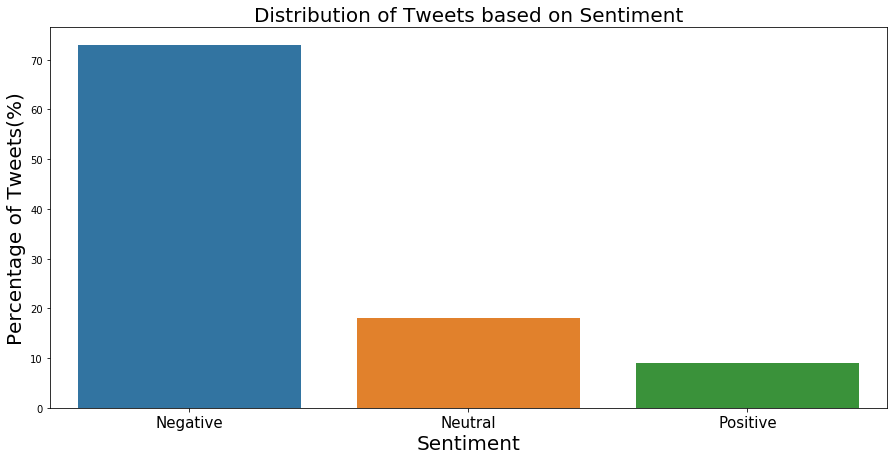

In [14]:
plt.figure(figsize = (15,7))
sns.barplot(x = df_eng['sentiment'].value_counts().index, y = df_eng['sentiment'].value_counts()/len(df_eng)*100)
plt.xlabel('Sentiment', fontsize = 20)
plt.ylabel('Percentage of Tweets(%)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.title('Distribution of Tweets based on Sentiment', fontsize = 20)
plt.show()

75% of the tweets are Negative whereas only 10% of the tweets are Positive

In [15]:
from wordcloud import WordCloud
def plot_wordcloud(data):
    words = []
    for sent in data:
        for word in sent:
            words.append(word) 
    words = pd.Series(words).str.cat(sep=' ')
    wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(words)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

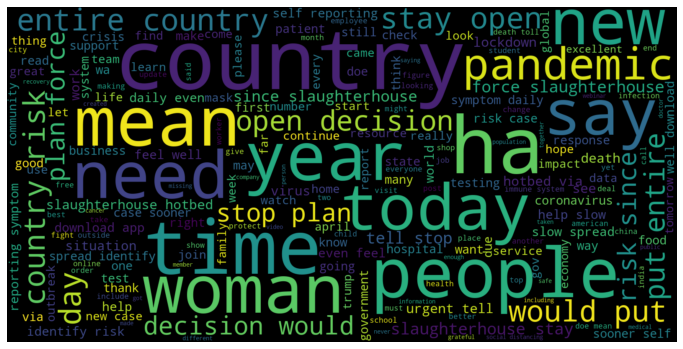

In [16]:
plot_wordcloud(df_eng['text_clean'][df_eng['sentiment'] == 'Positive'])

There some words which are common in both the positive and negative tweets like Coronavirus, Pandemic, Lockdown because they are the main subject of these tweets and are therefore in most of them.

<b>Positive tweets:</b> These mostly contain words like 'help', 'social distancing',  'self reporting' which are related to spreading awareness about how the spread of virus can be slowed down by staying at home and containing the pandemic. Also people have shared different ways through which one can take care of their mental health like self reporting.

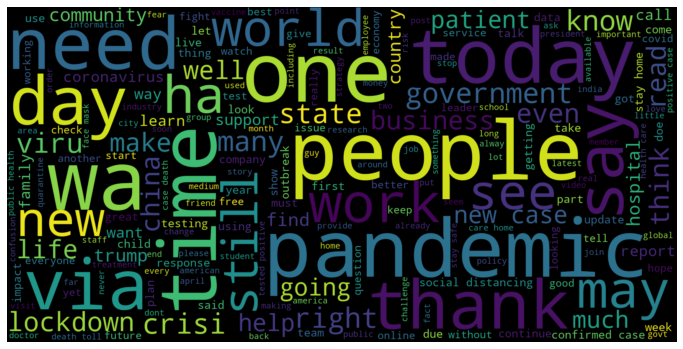

In [17]:
plot_wordcloud(df_eng['text_clean'][df_eng['sentiment'] == 'Negative'])

<b>Negative tweets:</b> These tweets mostly contain words like 'business', 'work', 'government' which are related to how businesses are facing heavy losses during this lockdown and how this has caused many employees to be laid off as their companies are not able to make enough profits.

# Hashtags Visualization

Hashtags help to categorize any content. Therefore in a way they give a good idea about the theme and contents of a particular tweet.

In [6]:
import nltk

In [7]:
import re
def extract_hashtag(text):
    hashtags=[]
    for i in text:
        ht=re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    return hashtags

In [8]:
all_hashtags=extract_hashtag(df_eng.text)
def df_hashtag(sentiment_label):
    hashtags=extract_hashtag(df_eng.text[df_eng['sentiment']==sentiment_label])
    ht_fredist=nltk.FreqDist(sum(hashtags,[]))
    df_ht=pd.DataFrame({'Hashtag':list(ht_fredist.keys()),'Count':list(ht_fredist.values())})
    return df_ht

In [9]:
#Hashtags dataframes
# ht_neg_df=df_hashtag('Negative')
# ht_neu_df=df_hashtag('Neutral')
# ht_pos_df=df_hashtag('Positive')

In [10]:
ht_neg_df.to_pickle('ht_neg_df.pkl')
ht_neu_df.to_pickle('ht_neu_df.pkl')
ht_pos_df.to_pickle('ht_pos_df.pkl')

In [24]:
def plot_hashtag(df,title):
    data=df.nlargest(columns="Count",n=20)
    plt.figure(figsize=(16,5))
    ax=sns.barplot(data=data,x='Hashtag',y='Count')
    plt.suptitle(title, fontsize=20)
    plt.xlabel('Hashtag', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.xticks(rotation=90)
    plt.tick_params(labelsize=15)
    plt.show()

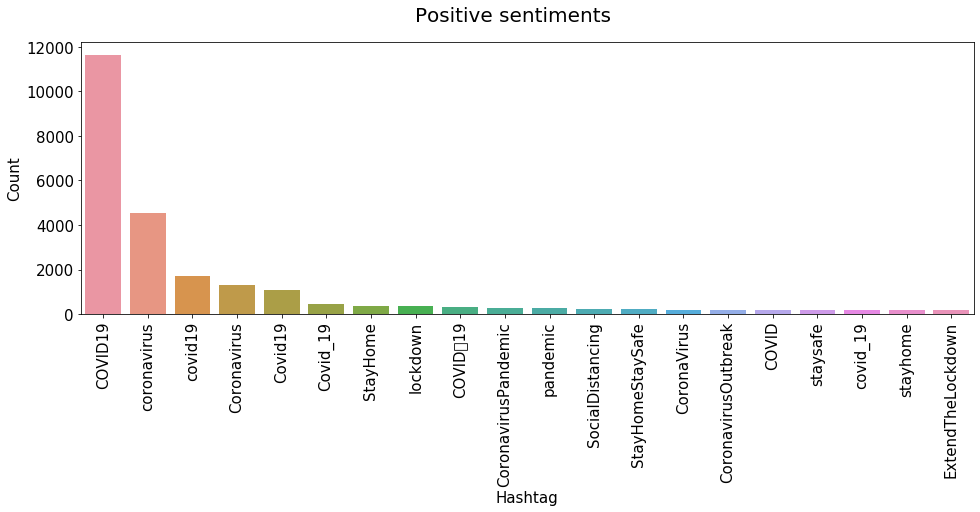

In [25]:
plot_hashtag(ht_pos_df,'Positive sentiments')

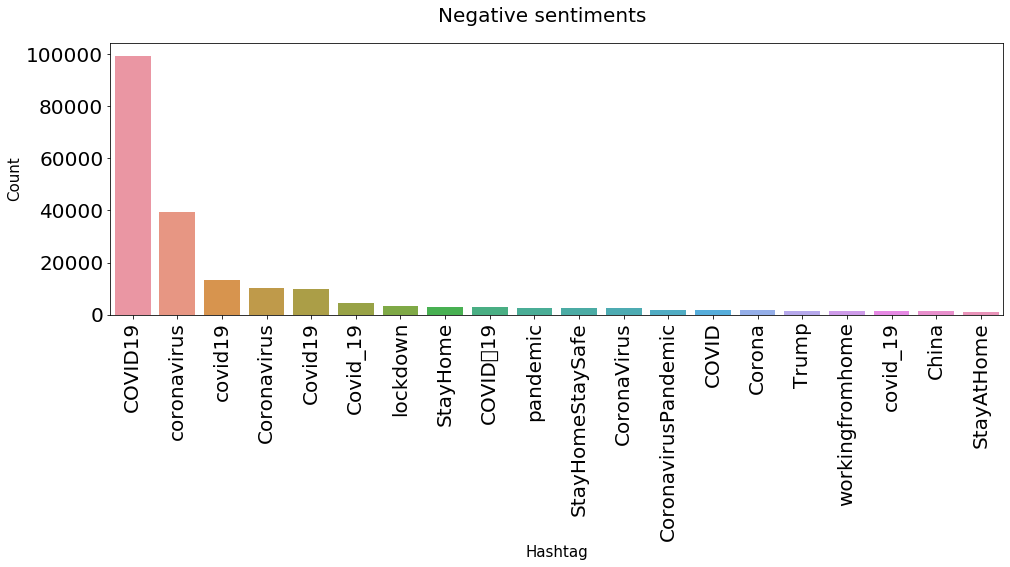

In [23]:
plot_hashtag(ht_neg_df,'Negative sentiments')

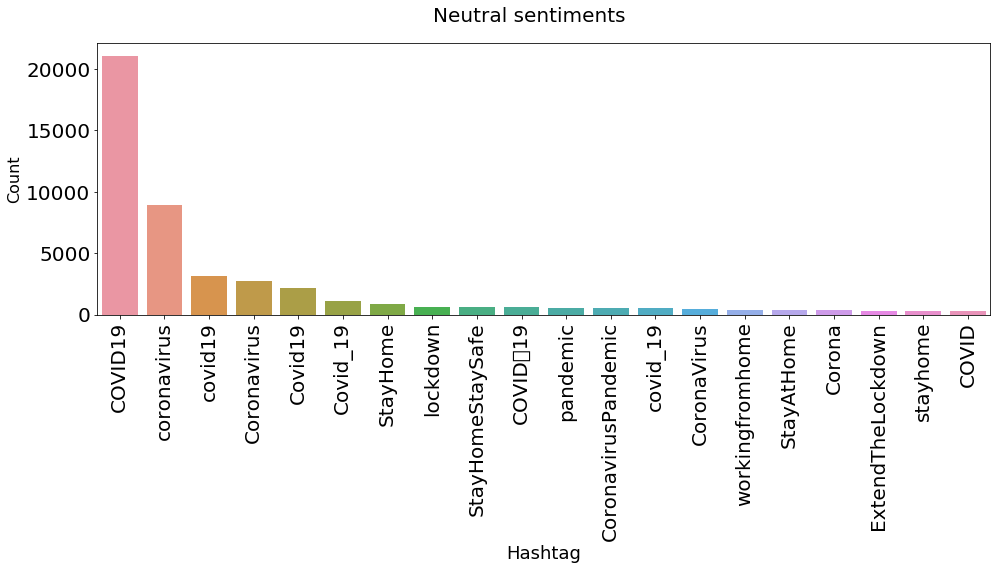

In [14]:
plot_hashtag(ht_neu_df,'Neutral sentiments')

## Sentiment-wise Likes ratio

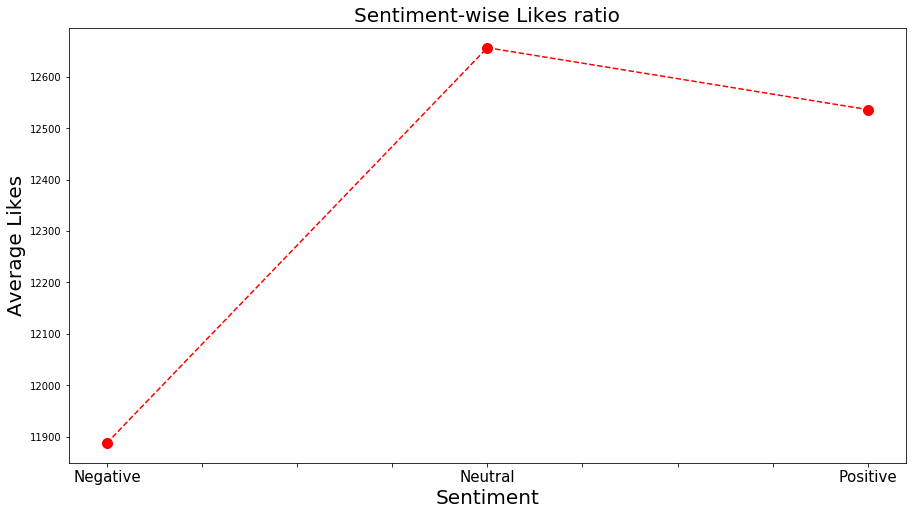

In [122]:
plt.figure(figsize = (15,8))
df_eng.groupby(['sentiment'])['favourites_count'].mean().plot(color='red', linestyle='dashed', marker='o',
                                                            markerfacecolor='red', markersize=10)
plt.title('Sentiment-wise Likes ratio', fontsize = 20)
plt.xlabel('Sentiment', fontsize = 20)
plt.ylabel('Average Likes', fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()

On average Positive and Neutral tweets gets more likes than Negative tweets.

# Sentiment-wise Retweets ratio

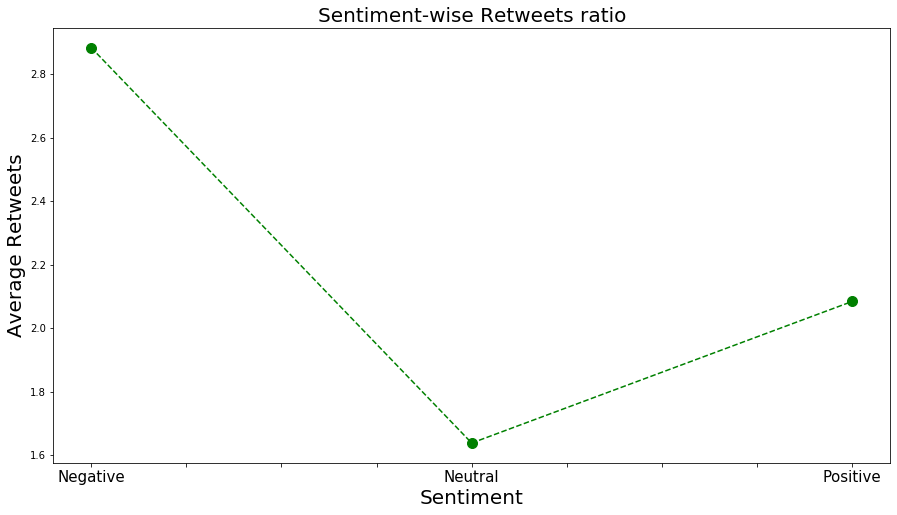

In [121]:
plt.figure(figsize = (15,8))
df_eng.groupby(['sentiment'])['retweet_count'].mean().plot(color='green', linestyle='dashed', marker='o',
                                                            markerfacecolor='g', markersize=10)
plt.title('Sentiment-wise Retweets ratio', fontsize = 20)
plt.xlabel('Sentiment', fontsize = 20)
plt.ylabel('Average Retweets', fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()

Negative tweets are retweeted the most on average followed by Positive tweets.

## Top 3 Most Liked Tweets

In [33]:
df_eng.sort_values(by = 'favourites_count', ascending = False).iloc[:3][['text','favourites_count']]

,text,favourites_count
32679,It's time @SmithfieldFoods took responsibility for what they did &amp; how they didn't protect their workers when the first case of #COVID19 came out in their factory like so not right at all!!! 😡...,1995152
210944,"Terrible, may she RIP. Hopefully this doesn't become a trend and medical professionals get the mental healthcare they need to overcome so much suffering and death.\n#Coronavirus: Top NYC doctor ta...",1311806
283689,"In 2019, Trump admin restarted&amp;funded controversial Wuhan lab with millions of U.S. dollars for risky #coronavirus ""gain of function"" research, which tested how bat🦇 coronavirus could mutate t...",1311600


## Top 3 Most Retweeted Tweets

In [20]:
df_eng.sort_values(by = 'retweet_count', ascending = False).iloc[:3][['text','retweet_count']]

,text,retweet_count
284406,"I again want to thank @realDonaldTrump and @VP for supporting the people of Louisiana during this difficult time. We had a great conversation today, and I look forward to continuing to work with o...",6011
275987,"BREAKING: America's top #coronavirus scientific adviser says a US trial of 1,000+ volunteers shows a drug CAN block this virus.. &amp; it's a clear cut..positive result in diminishing the time to ...",5336
210304,"AG Barr will be participating in the nationwide #AskTheAG Q&amp;A session on May 1 at 12pm ET\n \nSend us your Qs on how DOJ is protecting public safety &amp; combatting fraud, price gouging, hoar...",5302


# Time Series Analysis

In [123]:
df_eng['time'] = pd.to_datetime(df_eng['created_at'])

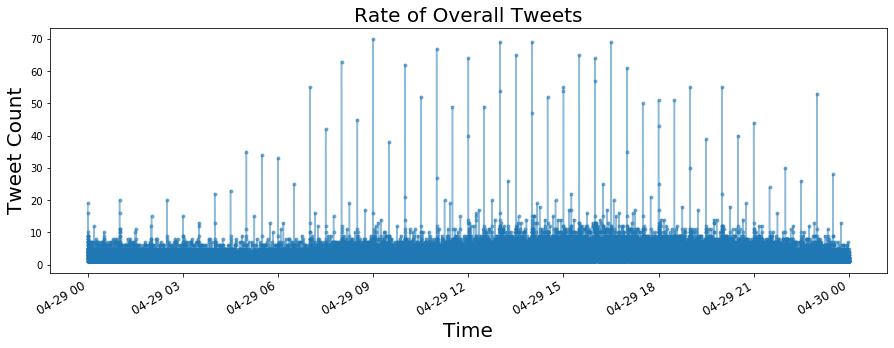

In [176]:
df_eng.groupby(['time'])['text'].count().plot(marker='.', alpha=0.5, figsize=(15, 5))
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Tweet Count', fontsize = 20)
plt.xticks(fontsize = 12)
plt.title('Rate of Overall Tweets', fontsize = 20)
plt.show()

On average people are active between 8:00am to 9:00pm

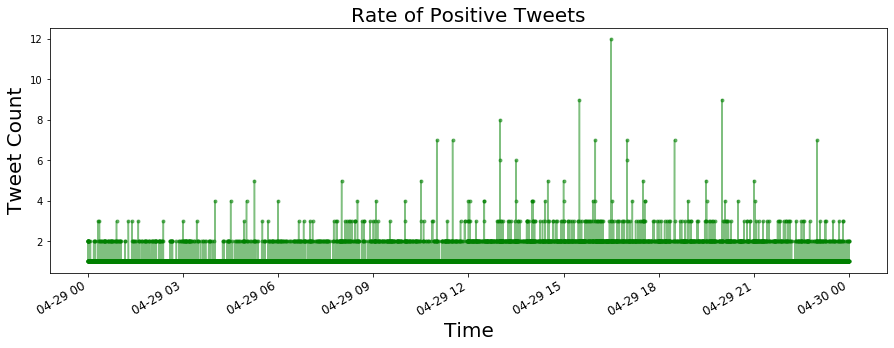

In [184]:
df_eng[df_eng['sentiment'] == 'Positive'].groupby(['time'])['text'].count().plot(marker='.', alpha=0.5, figsize=(15, 5),
                                                                                 color = 'g',markerfacecolor='g')
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Tweet Count', fontsize = 20)
plt.xticks(fontsize = 12)
plt.title('Rate of Positive Tweets', fontsize = 20)
plt.show()

Positive tweets seem to occur more frequently between 3:00pm to 8:00pm

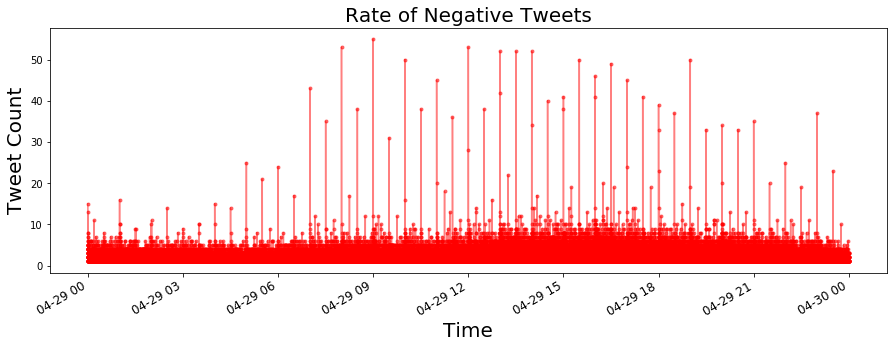

In [183]:
df_eng[df_eng['sentiment'] == 'Negative'].groupby(['time'])['text'].count().plot(marker='.', alpha=0.5, figsize=(15, 5),
                                                                                 color = 'r',markerfacecolor='r')
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Tweet Count', fontsize = 20)
plt.xticks(fontsize = 12)
plt.title('Rate of Negative Tweets', fontsize = 20)
plt.show()

Negative tweets are more frequent between 7:00am to 11:00pm and they seem to occur at amuch higher rate than Positive tweets.

# Topic Modelling using LDA

<b>Topic Modelling</b> helps us to understand and summarise large collections of text. So far I have used <b>WordClouds</b> to manually look through the words and get a basic understanding of the different topics the tweets were related to. But there are much better statistical methods like <b>LDA</b> which can be used to discover <b>abstract topics</b> in a collection of documents.

<b>LDA</b> or <b>Latent Dirichlet Allocation</b> is used to classify text in a document to a particular topic. It backtracks and tries to figure out which topics would create the given documents. Then it assigns words to a given topic with some probability.

In [28]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(docs)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in docs]

In [29]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [45]:
# Running and Trainign LDA model on the document term matrix.
ldamodel2 = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=10, iterations=10) 

In [75]:
for idx, topic in ldamodel2.show_topics(formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(idx+1, '|'.join([w[0] for w in topic])))

Topic: 1 
Words: worker|health|business|state|open|country|pandemic|food|plan|ha|via|support|slaughterhouse|risk|stay|order|government|emergency|force|need|stop|would|community|help|put|decision|may|since|local|medical
Topic: 2 
Words: death|case|new|number|ha|test|total|day|state|today|positive|testing|people|died|update|coronavirus|confirmed|patient|rate|april|tested|million|report|reported|dead|week|hospital|county|country|per
Topic: 3 
Words: ...|people|wa|like|get|one|ha|would|know|going|trump|time|back|day|want|think|doe|say|virus|life|thing|many|right|still|dont|even|really|see|year|world
Topic: 4 
Words: pandemic|new|news|response|ha|crisis|coronavirus|drug|dr.|show|read|impact|live|global|join|trial|say|data|today|via|may|time|watch|disease|latest|good|learn|great|study|world
Topic: 5 
Words: help|home|mask|please|need|people|stay|care|safe|keep|thank|face|family|work|time|make|support|child|life|social|use|get|patient|let|working|distancing|spread|free|one|others


The LDA model has managed to classify the words into 5 abstract topics. On reading the individual words of a topic we can see that the words are not randomly assigned and that these words together have some meaning. 

The <b>first topic</b> contains words like <b>'worker', 'business', 'health', 'open'</b> which are related the losses faced by <b>businesses</b> and also the reaction to people regarding the <b>government's decisions</b>. The <b>second topic</b> is related to the <b>daily updates</b> on the number of cases that have increased along with the death rate and recovery rate. Some topics are not as easily interpretable like the <b>third topic</b>, it may seem a little vague at first compared to the other four topics but it seems like it is linked with how people are questioning Trump about the <b>current affairs</b>. The <b>fourth topic</b> is associated with <b>news</b> and the <b>fifth topic</b> with something more <b>positive</b> than the other topics for instance it seems to be linked with <b>spreading awareness</b> about social distancing, helping and supporting others.

# Conclusion:

This pandemic has been a psychological crisis. It has the potential to drastically affect the mental well-being of many. Therefore even in this time of social distancing it is important to understand what one is going through and provide them with all the necessary help and support they need. 

Therefore the above analysis of the tweets is one way through which people and government can understand the mental and emotional state of a given population and aid them through these times.

Thank You for taking some time and reading this notebook. Stay Home Stay Safe.